Make sure you write dimesnions using writeDimensions(nx, ny)
2 0.1 40 4


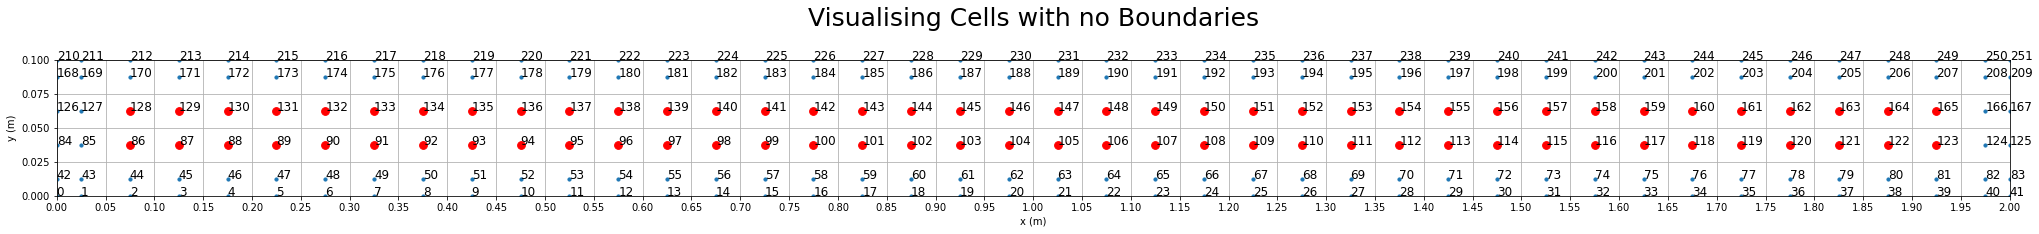

/home/scottlevie/newPythonSolver/python_fv_csm/seperate_notebooks/Background_Functions.ipynb:350: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  "        \n",


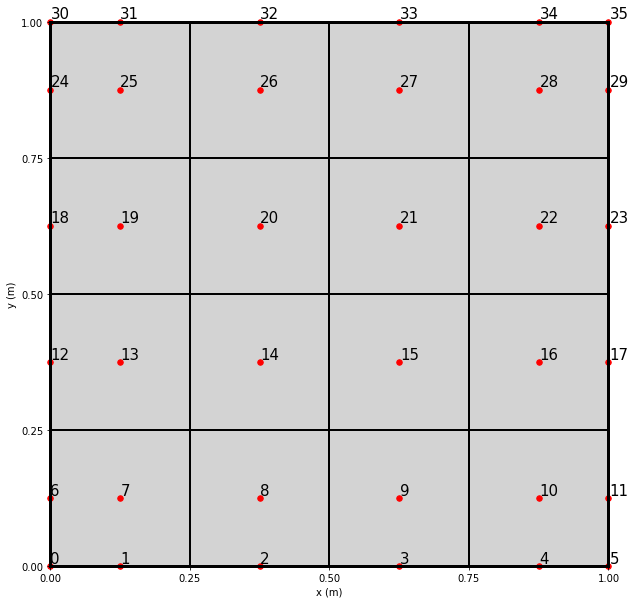

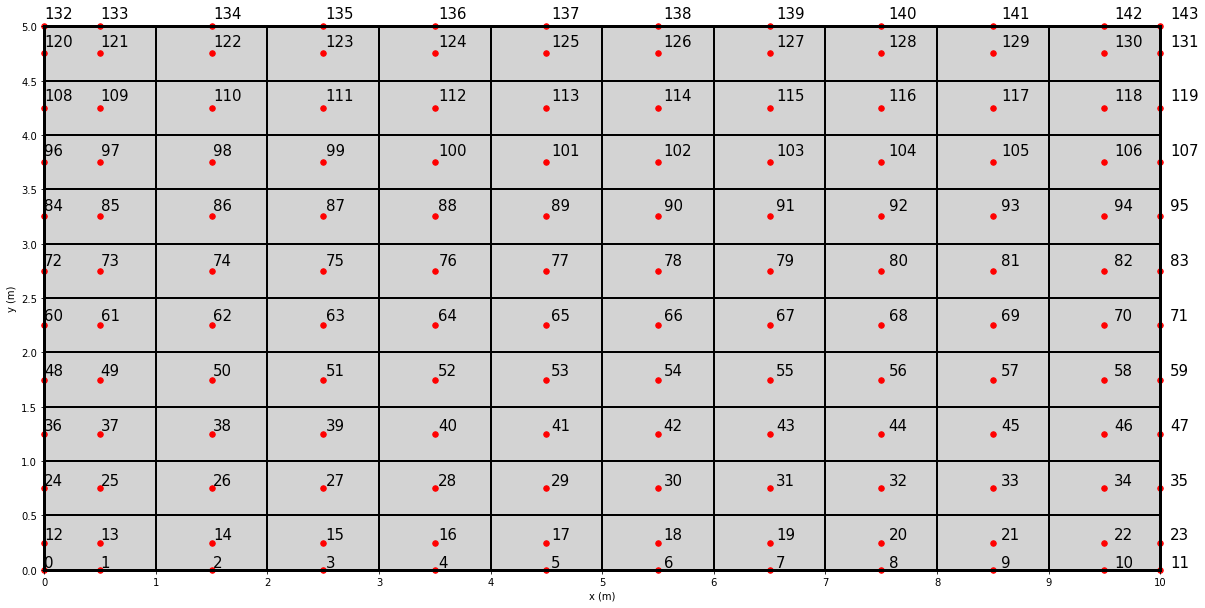

(144, 2)
Number of nodes in Mesh: 144
Number of dimensions: 2
Shear Modulus (mu): 76923076923.07692
Lame Modulus (_lambda): 115384615384.61539
Printing example a-term values for fixed displacement cell on the top boundary:

a_N should be twice the size of a_S
a_E and a_W should be identical

Value for a_N:  307692307692.3077
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  730769230769.2308
Printing a-term values for fixed traction cell on the top boundary:

a_N should 0
a_E and a_W should be identical

Value for a_N:  0
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  423076923076.9231


/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


icorr = 0, Residual = 709614115129721.62500000000000000000, normFactor = 0.00000000000000000002
icorr = 1, Residual = 0.50441396253873549416, normFactor = 0.00000064999999999996
icorr = 2, Residual = 15.85984787855874422746, normFactor = 0.00000064999999999996


In [1]:
from ipynb.fs.full.Background_Functions import *
from ipynb.fs.full._06_Solution_Algorithm import *

# Ignore outputs from this cell

# Time Loop
***

But what if the problem case changes with time? We will have to perform the momentum loop for each timestep. 

Firstly we'll discretize time:

In [2]:
tf = 2       # Total time in seconds
dt = 0.1     # Time-step size (s)

# Time array
t = np.array(np.arange(0,tf, dt))

print("Time-step array:")
print(t)

Time-step array:
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9]


Now for each timestep we need to perform the momentum loop. This is called the time loop. We also need to activate the <code>transient</code> setting. 

In [3]:
transient = True

Time Loop Structure:

       for timestep in time:

              reset iteration counter

              momentum loop

              # Update variables   
              U_old_old = U_old
              U_old = U_new
                
                  

In [4]:
# initialise fields
b_x = np.zeros([(ny+2)*(nx+2),1])
b_y = np.zeros([(ny+2)*(nx+2),1])

U_new = initalise_U_field(nx, ny)
U_old = initalise_U_field(nx, ny)
U_old_old = initalise_U_field(nx, ny)

In [5]:
# Time loop

# Define momentum loop tolerance:
tolerance = 1e-6

for time in t:

    print("\nTime = " + str(time))
       
    # Reset iteration counter
    icorr = 1

    # Set number of maximum iterations for convergence    
    # This will be increased in following cells
    maxcorr = 10

    # Momentum Loop    
    while True:
        
        # Store solution for previous iteration
        U_previous = U_new 

        # x-equation
        # Create A and b matrices
        A_x = A("x").createMatrix()        
        A_x, b_x = boundary_conditions(A_x, b_x, U_previous, U_old, U_old_old, "x")

        # Solve for u        
        u = spsolve(A_x, b_x)
        u = np.array(u)
        
        # y-equation
        # Create A and b matrices        
        A_y = A("y").createMatrix()
        A_y, b_y = boundary_conditions(A_y, b_y, U_previous, U_old, U_old_old, "y")
        
        # Solve for v
        v = spsolve(A_y, b_y)
        v = np.array(v)
        
        # Update U_New with new u and v fields
        U_new = np.vstack((u, v)).T
       
        # Calculate the residual of each iteration        
        normFactor = np.max(U_new)
        residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor     

        # print values
        print("Iteration: {:01d},\t Residual = {:.20f},\t normFactor = {:.20f}".format(icorr, residual, normFactor))

        # Convergence check
        if residual < tolerance: break
            
        elif icorr > maxcorr: break            
        
        # Increment iteration counter
        icorr = icorr + 1
    
    # Update displacement temporal fields      
    U_old_old = U_old
    U_old = U_new



Time = 0.0
Iteration: 1,	 Residual = 709614115129721.62500000000000000000,	 normFactor = 0.00000000000000000002
Iteration: 2,	 Residual = 0.50441396253873549416,	 normFactor = 0.00000064999999999996
Iteration: 3,	 Residual = 15.85984787855874422746,	 normFactor = 0.00000064999999999996
Iteration: 4,	 Residual = 0.24957934900920691890,	 normFactor = 0.00000130000000000034
Iteration: 5,	 Residual = 7.76581962333586961478,	 normFactor = 0.00000130000000000034
Iteration: 6,	 Residual = 0.16512772937020803177,	 normFactor = 0.00000194999999999936
Iteration: 7,	 Residual = 5.09613373793721180505,	 normFactor = 0.00000194999999999936
Iteration: 8,	 Residual = 0.12306109135369061591,	 normFactor = 0.00000259999999999645
Iteration: 9,	 Residual = 3.77189692917488494928,	 normFactor = 0.00000259999999999645
Iteration: 10,	 Residual = 0.09789809843786333177,	 normFactor = 0.00000324999999998061
Iteration: 11,	 Residual = 2.98263657692521499953,	 normFactor = 0.00000324999999998061

Time = 0.1
It

The following updates to the time loop prints convergence progress report graphs, and saves converged displacement $U$ fields to .csv files. (*The coding of these additions are not important to understand.*)

Now let's allow the time loop to come to convergence for the non-transient problem:

In [6]:
# initialise fields
b_x = np.zeros([(ny+2)*(nx+2),1])
b_y = np.zeros([(ny+2)*(nx+2),1])

# b_x = csr_matrix(((ny+2)*(nx+2), 1))#.toarray()   
# b_y = csr_matrix(((ny+2)*(nx+2), 1))#.toarray()   


U_new = initalise_U_field(nx, ny)
U_old = initalise_U_field(nx, ny)
U_old_old = initalise_U_field(nx, ny)

In [7]:
transient = False


Time = 0
Iteration: 100,	 Residual = 0.00861212356604922243,	 normFactor = 0.00003249705169882678,	 Moving Average = 7096141151297.88769531250000000000,	 Time = 0.00000
Iteration: 200,	 Residual = 0.00391950172617213689,	 normFactor = 0.00006476581829688420,	 Moving Average = 0.07861823085172321701,	 Time = 0.00000
Iteration: 300,	 Residual = 0.00241552991876183400,	 normFactor = 0.00009594280494077450,	 Moving Average = 0.04010188895262908892,	 Time = 0.00000
Iteration: 400,	 Residual = 0.00169048522083169455,	 normFactor = 0.00012527359928303755,	 Moving Average = 0.02577808059830782178,	 Time = 0.00000
Iteration: 500,	 Residual = 0.00126925335111850940,	 normFactor = 0.00015245683464249713,	 Moving Average = 0.01848122154544401888,	 Time = 0.00000


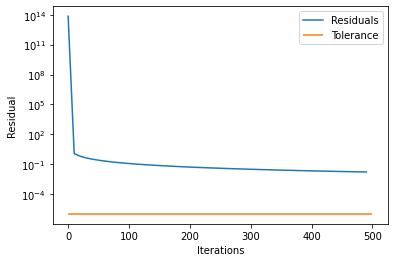

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 600,	 Residual = 0.00099621229232860317,	 normFactor = 0.00017746280351213696,	 Moving Average = 0.01410912138998610121,	 Time = 0.00000
Iteration: 700,	 Residual = 0.00080597586732791327,	 normFactor = 0.00020038269430042990,	 Moving Average = 0.01121220401165101861,	 Time = 0.00000
Iteration: 800,	 Residual = 0.00066649360837687935,	 normFactor = 0.00022135356834694316,	 Moving Average = 0.00915830620243736002,	 Time = 0.00000
Iteration: 900,	 Residual = 0.00056028799332999944,	 normFactor = 0.00024052471619025249,	 Moving Average = 0.00763056477503068140,	 Time = 0.00000
Iteration: 1000,	 Residual = 0.00047704693913323425,	 normFactor = 0.00025804326517604433,	 Moving Average = 0.00645329267438051087,	 Time = 0.00000


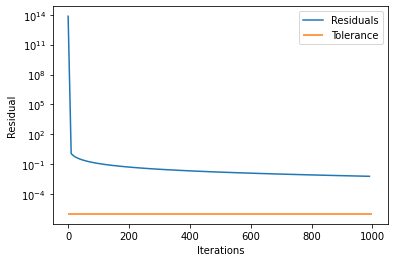

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 1100,	 Residual = 0.00041030429122420275,	 normFactor = 0.00027404840784763689,	 Moving Average = 0.00552131768389426195,	 Time = 0.00000
Iteration: 1200,	 Residual = 0.00035580399181212724,	 normFactor = 0.00028866942941285485,	 Moving Average = 0.00476779486889610665,	 Time = 0.00000
Iteration: 1300,	 Residual = 0.00031063167466028550,	 normFactor = 0.00030202537889633904,	 Moving Average = 0.00414816234023331412,	 Time = 0.00000
Iteration: 1400,	 Residual = 0.00027272507819900015,	 normFactor = 0.00031422542594546120,	 Moving Average = 0.00363154075720680545,	 Time = 0.00000
Iteration: 1500,	 Residual = 0.00024058394412077128,	 normFactor = 0.00032536947993170218,	 Moving Average = 0.00319583854278821357,	 Time = 0.00000


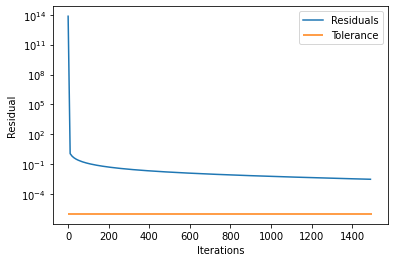

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 1600,	 Residual = 0.00021309076324974128,	 normFactor = 0.00033554888624589061,	 Moving Average = 0.00282482340484080559,	 Time = 0.00000
Iteration: 1700,	 Residual = 0.00018939597946063868,	 normFactor = 0.00034484712066446888,	 Moving Average = 0.00250629494859859079,	 Time = 0.00000
Iteration: 1800,	 Residual = 0.00016884216633565751,	 normFactor = 0.00035334044963259185,	 Moving Average = 0.00223090284932821745,	 Time = 0.00000
Iteration: 1900,	 Residual = 0.00015091257814687931,	 normFactor = 0.00036109854500196382,	 Moving Average = 0.00199135872682478258,	 Time = 0.00000
Iteration: 2000,	 Residual = 0.00013519540317476043,	 normFactor = 0.00036818505072805840,	 Moving Average = 0.00178189643878360737,	 Time = 0.00000


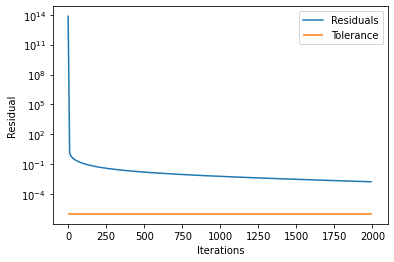

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 2100,	 Residual = 0.00012135840045231679,	 normFactor = 0.00037465810282585736,	 Moving Average = 0.00159789383198838397,	 Time = 0.00000
Iteration: 2200,	 Residual = 0.00010913056404954402,	 normFactor = 0.00038057080534266853,	 Moving Average = 0.00143560218750455248,	 Time = 0.00000
Iteration: 2300,	 Residual = 0.00009828864330818262,	 normFactor = 0.00038597166558802543,	 Moving Average = 0.00129194916021610159,	 Time = 0.00000
Iteration: 2400,	 Residual = 0.00008864708172350831,	 normFactor = 0.00039090499189215421,	 Moving Average = 0.00116439290278426357,	 Time = 0.00000
Iteration: 2500,	 Residual = 0.00008005040350165947,	 normFactor = 0.00039541125702375083,	 Moving Average = 0.00105081249027371153,	 Time = 0.00000


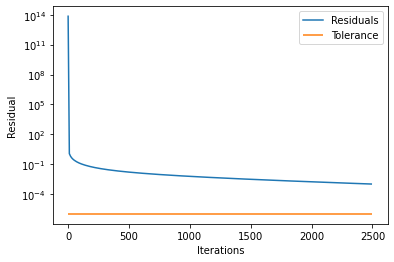

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 2600,	 Residual = 0.00007236737964967083,	 normFactor = 0.00039952743018921644,	 Moving Average = 0.00094942451446783339,	 Time = 0.00000
Iteration: 2700,	 Residual = 0.00006548650602975815,	 normFactor = 0.00040328728030805916,	 Moving Average = 0.00085871882614271897,	 Time = 0.00000
Iteration: 2800,	 Residual = 0.00005931246111968132,	 normFactor = 0.00040672165304538293,	 Moving Average = 0.00077740847810811239,	 Time = 0.00000
Iteration: 2900,	 Residual = 0.00005376330401898739,	 normFactor = 0.00040985872386465965,	 Moving Average = 0.00070439033104109693,	 Time = 0.00000
Iteration: 3000,	 Residual = 0.00004876823786951976,	 normFactor = 0.00041272422917708221,	 Moving Average = 0.00063871375717532933,	 Time = 0.00000


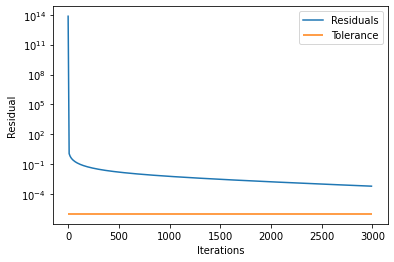

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 3100,	 Residual = 0.00004426580952605854,	 normFactor = 0.00041534167748047694,	 Moving Average = 0.00057955555875374449,	 Time = 0.00000
Iteration: 3200,	 Residual = 0.00004020244896885659,	 normFactor = 0.00041773254222289796,	 Moving Average = 0.00052619970279474339,	 Time = 0.00000
Iteration: 3300,	 Residual = 0.00003653127561755739,	 normFactor = 0.00041991643796971111,	 Moving Average = 0.00047802082222539433,	 Time = 0.00000
Iteration: 3400,	 Residual = 0.00003321111603807734,	 normFactor = 0.00042191128131957166,	 Moving Average = 0.00043447068742230691,	 Time = 0.00000
Iteration: 3500,	 Residual = 0.00003020569036416611,	 normFactor = 0.00042373343789309822,	 Moving Average = 0.00039506703893732372,	 Time = 0.00000


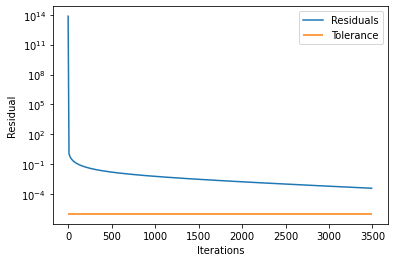

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 3600,	 Residual = 0.00002748293433986401,	 normFactor = 0.00042539785659480116,	 Moving Average = 0.00035938431118277998,	 Time = 0.00000
Iteration: 3700,	 Residual = 0.00002501443112513612,	 normFactor = 0.00042691819225344698,	 Moving Average = 0.00032704588109027467,	 Time = 0.00000
Iteration: 3800,	 Residual = 0.00002277493249776219,	 normFactor = 0.00042830691764567531,	 Moving Average = 0.00029771755475111031,	 Time = 0.00000
Iteration: 3900,	 Residual = 0.00002074195333239660,	 normFactor = 0.00042957542582377367,	 Moving Average = 0.00027110206537929183,	 Time = 0.00000
Iteration: 4000,	 Residual = 0.00001889542645805575,	 normFactor = 0.00043073412358048385,	 Moving Average = 0.00024693440232781226,	 Time = 0.00000


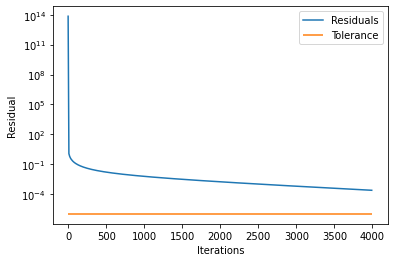

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 4100,	 Residual = 0.00001721740756927117,	 normFactor = 0.00043179251682936480,	 Moving Average = 0.00022497782687062041,	 Time = 0.00000
Iteration: 4200,	 Residual = 0.00001569182182918601,	 normFactor = 0.00043275928858930556,	 Moving Average = 0.00020502045862855759,	 Time = 0.00000
Iteration: 4300,	 Residual = 0.00001430424538844655,	 normFactor = 0.00043364237021941570,	 Moving Average = 0.00018687233850732326,	 Time = 0.00000
Iteration: 4400,	 Residual = 0.00001304171627292073,	 normFactor = 0.00043444900648859238,	 Moving Average = 0.00017036289158039899,	 Time = 0.00000
Iteration: 4500,	 Residual = 0.00001189257009912855,	 normFactor = 0.00043518581501064322,	 Moving Average = 0.00015533872714083779,	 Time = 0.00000


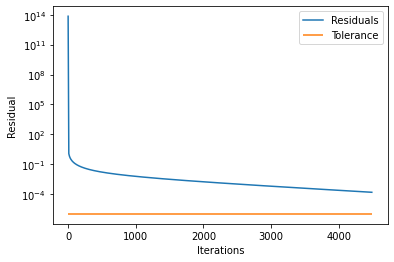

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 4600,	 Residual = 0.00001084629685500432,	 normFactor = 0.00043585884053493691,	 Moving Average = 0.00014166172435553848,	 Time = 0.00000
Iteration: 4700,	 Residual = 0.00000989341565200581,	 normFactor = 0.00043647360453817207,	 Moving Average = 0.00012920736082708693,	 Time = 0.00000
Iteration: 4800,	 Residual = 0.00000902536484326281,	 normFactor = 0.00043703515052085859,	 Moving Average = 0.00011786324862309000,	 Time = 0.00000
Iteration: 4900,	 Residual = 0.00000823440535956363,	 normFactor = 0.00043754808538588999,	 Moving Average = 0.00010752784820608099,	 Time = 0.00000
Iteration: 5000,	 Residual = 0.00000751353542249800,	 normFactor = 0.00043801661723083995,	 Moving Average = 0.00009810933546314174,	 Time = 0.00000


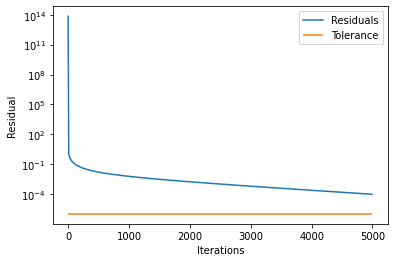

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 5100,	 Residual = 0.00000685641512594911,	 normFactor = 0.00043844458987422571,	 Moving Average = 0.00008952460100189470,	 Time = 0.00000
Iteration: 5200,	 Residual = 0.00000625729957067778,	 normFactor = 0.00043883551438745412,	 Moving Average = 0.00008169836407265671,	 Time = 0.00000
Iteration: 5300,	 Residual = 0.00000571097945183455,	 normFactor = 0.00043919259790022242,	 Moving Average = 0.00007456238618932448,	 Time = 0.00000
Iteration: 5400,	 Residual = 0.00000521272816417219,	 normFactor = 0.00043951876991329546,	 Moving Average = 0.00006805477170200369,	 Time = 0.00000
Iteration: 5500,	 Residual = 0.00000475825461231797,	 normFactor = 0.00043981670632874472,	 Moving Average = 0.00006211934447150029,	 Time = 0.00000


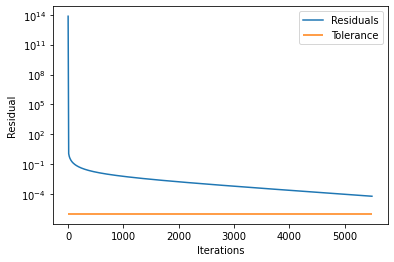

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 5600,	 Residual = 0.00000434366103608199,	 normFactor = 0.00044008885140606928,	 Moving Average = 0.00005670509130122433,	 Time = 0.00000
Iteration: 5700,	 Residual = 0.00000396540525449832,	 normFactor = 0.00044033743781373357,	 Moving Average = 0.00005176566410968275,	 Time = 0.00000
Iteration: 5800,	 Residual = 0.00000362026681399276,	 normFactor = 0.00044056450494496882,	 Moving Average = 0.00004725893392780784,	 Time = 0.00000
Iteration: 5900,	 Residual = 0.00000330531658879192,	 normFactor = 0.00044077191565007634,	 Moving Average = 0.00004314659069059958,	 Time = 0.00000
Iteration: 6000,	 Residual = 0.00000301788944833857,	 normFactor = 0.00044096137151842331,	 Moving Average = 0.00003939378365041863,	 Time = 0.00000


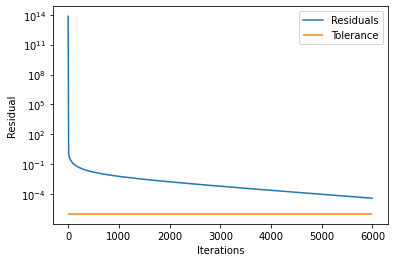

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 6100,	 Residual = 0.00000275555964493629,	 normFactor = 0.00044113442683953077,	 Moving Average = 0.00003596879784030667,	 Time = 0.00000
Iteration: 6200,	 Residual = 0.00000251611863973667,	 normFactor = 0.00044129250135227830,	 Moving Average = 0.00003284276261994488,	 Time = 0.00000
Iteration: 6300,	 Residual = 0.00000229755508356948,	 normFactor = 0.00044143689189461547,	 Moving Average = 0.00002998938885703970,	 Time = 0.00000
Iteration: 6400,	 Residual = 0.00000209803674173615,	 normFactor = 0.00044156878304048519,	 Moving Average = 0.00002738473164231292,	 Time = 0.00000
Iteration: 6500,	 Residual = 0.00000191589414970197,	 normFactor = 0.00044168925682032433,	 Moving Average = 0.00002500697589297289,	 Time = 0.00000


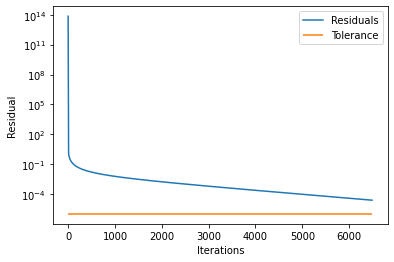

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 6600,	 Residual = 0.00000174960583008422,	 normFactor = 0.00044179930159658136,	 Moving Average = 0.00002283624243003361,	 Time = 0.00000
Iteration: 6700,	 Residual = 0.00000159778489832525,	 normFactor = 0.00044189982017221827,	 Moving Average = 0.00002085441247248126,	 Time = 0.00000
Iteration: 6800,	 Residual = 0.00000145916693466810,	 normFactor = 0.00044199163719825616,	 Moving Average = 0.00001904496862269510,	 Time = 0.00000
Iteration: 6900,	 Residual = 0.00000133259897196040,	 normFactor = 0.00044207550593773469,	 Moving Average = 0.00001739285075945162,	 Time = 0.00000
Iteration: 7000,	 Residual = 0.00000121702952789416,	 normFactor = 0.00044215211444677770,	 Moving Average = 0.00001588432530438555,	 Time = 0.00000


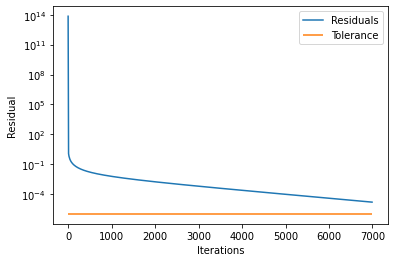

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 7100,	 Residual = 0.00000111149952684658,	 normFactor = 0.00044222209121874364,	 Moving Average = 0.00001450686657795973,	 Time = 0.00000
Iteration: 7200,	 Residual = 0.00000101513408072107,	 normFactor = 0.00044228601034078743,	 Moving Average = 0.00001324904907058151,	 Time = 0.00000

Residuals have converged:

Iteration: 7218,	 Residual = 0.00000099869883496516,	 normFactor = 0.00044229691367022954,	 Moving Average = 0.00001324904907058151,	 Time = 0.00000

Time = 1

Residuals have converged:

Iteration: 2,	 Residual = 0.00000099688922571325,	 normFactor = 0.00044229811421852487,	 Moving Average = 0.00001324904907058151,	 Time = 1.00000
Run time:  717.9052404119866


In [8]:
# Time loop

!rm -r Solution
! mkdir Solution

import timeit
start = timeit.default_timer()

# Define momentum loop tolerance:
tolerance = 1e-6

# Only allow one time-step if non transient
if not transient:
    t = np.array([0,1])

for time in t:

    print("\nTime = " + str(round(time, 1)))
    
    # Reset iteration counter
    icorr = 1

    # Set number of maximum iterations for convergence    
    maxcorr = 100000

    # Make directory for timestep
    ! mkdir Solution/{str(round(time, 1))}

    # Initialise arrays for graphs
    residual_array = np.array([])
    moving_average_array = np.array([])
    moving_average_graph_array = np.array([])

    # Momentum Loop    
    while True:
        
        # Store solution for previous iteration
        U_previous = U_new 

        # x-equation
        # Create A and b matrices
        A_x = A("x").createMatrix()        
        A_x, b_x = boundary_conditions(A_x, b_x, U_previous, U_old, U_old_old, "x")

        # Solve for u        
        u = spsolve(A_x, b_x)
        u = np.array(u)
        
        # y-equation
        # Create A and b matrices        
        A_y = A("y").createMatrix()
        A_y, b_y = boundary_conditions(A_y, b_y, U_previous, U_old, U_old_old, "y")
        
        # Solve for v
        v = spsolve(A_y, b_y)
        v = np.array(v)
        
        # Update U_New with new u and v fields
        U_new = np.vstack((u, v)).T
       
        # Calculate the residual of each iteration        
        normFactor = np.max(U_new)
        residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor

        # Append residual array with residual
        residual_array = np.append(residual_array, residual)

        # The following is for on-going convergence reports:
        # Print out residual every 100 iterations
        if icorr%100 == 0 :
            moving_average = np.mean(residual_array[len(residual_array)-100 :len(residual_array) ])
            moving_average_array = np.append(moving_average_array, moving_average)
            print("Iteration: {:01d},\t Residual = {:.20f},\t normFactor = {:.20f},\t Moving Average = {:.20f},\t Time = {:.5f}".format(icorr, residual, normFactor, moving_average, time))

        # Calculate moving average of residual
        if icorr%10 == 0 :
            moving_average_graph = np.mean(residual_array[len(residual_array)-10 :len(residual_array) ])
            moving_average_graph_array = np.append(moving_average_graph_array, moving_average_graph)

        # Print residual progress every 500 iterations
        if icorr % 500 == 0:

            # plt.plot(np.arange(0, len(residual_array)), residual_array, label = "Residuals")
            plt.plot(np.arange(0, len(moving_average_graph_array)*10, 10), moving_average_graph_array, label = "Residuals")
            # plt.scatter((len(moving_average_graph_array)-50)*10, moving_average_graph_array[len(moving_average_graph_array)-50], color = "C1", label  = "Residual 500 iterations ago")
            plt.hlines(tolerance, 0, len(moving_average_graph_array)*10, color = "C1", label  = "Tolerance")
            plt.yscale("log")
            plt.xlabel("Iterations")
            plt.ylabel("Residual")
            plt.legend()
            plt.show()
        

        # Convergence check
        if residual < tolerance:

            print("\nResiduals have converged:\n")            
            print("Iteration: {:01d},\t Residual = {:.20f},\t normFactor = {:.20f},\t Moving Average = {:.20f},\t Time = {:.5f}".format(icorr, residual, normFactor, moving_average, time))

            break
            
        elif icorr > maxcorr:
            
            break            
        
        # Increment iteration counter
        icorr = icorr + 1
    
    # Update displacement temporal fields      
    U_old_old = U_old
    U_old = U_new

    # Save displacement field
    saveArray(str(round(time, 1)) + "/U" , U_new)

stop = timeit.default_timer()

print('Run time: ', stop - start)

As you can see the residuals for the momentum loop converge after approximately 7200 iterations. These results will be analysed in the next notebook.